# 01. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
from sklearn.preprocessing import LabelEncoder

# 02. Importing dataframe

In [2]:
# Creating path first
path = r'/Users/jaksdt/Desktop/Data analytics stuff/Data immersion/Exercises 1 - 10/Section 6'

In [3]:
# Importing dataframe
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'citibike.csv'), index_col = False)

In [4]:
df

,Unnamed: 0,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,0,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968,Female
1,1,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983,Male
2,2,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989,Male
3,3,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988,Female
4,4,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1976,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49972,49995,17988,Sat,18,2013-09-21 18:39:20,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-21 20:08:59,478,11 Ave & W 41 St,40.760301,-73.998842,2697,Non-Subscriber,1976,Unknown
49973,49996,18458,Sat,17,2013-09-14 17:32:26,261,Johnson St & Gold St,40.694749,-73.983625,2013-09-14 17:52:17,151,Cleveland Pl & Spring St,40.721816,-73.997203,1191,Subscriber,1970,Female
49974,49997,15054,Sat,18,2013-09-07 18:08:21,402,Broadway & E 22 St,40.740343,-73.989551,2013-09-07 18:25:51,524,W 43 St & 6 Ave,40.755273,-73.983169,1050,Subscriber,1961,Female
49975,49998,16763,Sat,13,2013-09-07 13:25:35,271,Ashland Pl & Hanson Pl,40.685282,-73.978058,2013-09-07 14:14:04,373,Willoughby Ave & Walworth St,40.693317,-73.953820,2697,Non-Subscriber,1976,Unknown


In [5]:
# Dropping unecessary column
df = df.drop (columns = ['Unnamed: 0'])
df.head(5)

,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968,Female
1,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983,Male
2,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989,Male
3,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988,Female
4,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1976,Unknown


In [13]:
# Changing 'gender', 'subscriber', and 'weekday' data types from str to int for corr visuals. 

le = LabelEncoder()
df["gender"] = le.fit_transform(df['gender'])
df["subscriber"] = le.fit_transform(df['subscriber'])
df["weekday"] = le.fit_transform(df['weekday'])
df["start_time"] = le.fit_transform(df['start_time'])
df["end_time"] = le.fit_transform(df['end_time'])
df["start_station_name"] = le.fit_transform(df['start_station_name'])
df["end_station_name"] = le.fit_transform(df['end_station_name'])
df.head(5)

,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,16013,1,18,13105,523,287,40.754666,-73.991382,13097,334,271,40.742388,-73.997262,993,1,1968,0
1,15230,4,18,18349,257,203,40.719392,-74.002472,18322,236,252,40.728419,-73.987140,581,1,1983,1
2,17942,6,19,28329,479,23,40.760193,-73.991255,28334,513,307,40.768254,-73.988639,361,1,1989,1
3,19683,2,11,44628,527,121,40.743156,-73.974347,44662,441,138,40.756014,-73.967416,561,1,1988,0
4,18024,2,18,9936,521,16,40.750450,-73.994811,9993,476,119,40.743943,-73.979661,2296,0,1976,2


In [14]:
df.dtypes

bike_id                      int64
weekday                      int64
start_hour                   int64
start_time                   int64
start_station_id             int64
start_station_name           int64
start_station_latitude     float64
start_station_longitude    float64
end_time                     int64
end_station_id               int64
end_station_name             int64
end_station_latitude       float64
end_station_longitude      float64
trip_duration                int64
subscriber                   int64
birth_year                   int64
gender                       int64
dtype: object

## I had to convert all to int, because I was still getting those value error messages. But since you converted gender, subscriber and weekday, I figured it should be ok? 

In [15]:
df.corr()

,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
bike_id,1.000000,0.004519,-0.000616,0.011809,0.003575,0.000744,-0.009543,-0.002271,0.011818,0.002402,0.000368,-0.006960,-0.001477,0.003496,0.004507,0.006431,-0.001724
weekday,0.004519,1.000000,-0.006772,-0.125497,-0.007616,0.002847,0.010568,-0.002900,-0.125290,-0.002853,0.003933,0.012863,0.005461,-0.023907,0.035500,-0.015936,-0.020805
start_hour,-0.000616,-0.006772,1.000000,0.025002,-0.001214,0.014954,-0.009111,-0.045836,0.024941,0.003995,-0.017566,-0.036988,0.007049,0.040906,-0.030937,0.060431,0.013798
start_time,0.011809,-0.125497,0.025002,1.000000,0.006150,-0.007136,-0.009254,0.002131,0.999996,0.007314,-0.012509,-0.003577,0.005889,-0.018795,0.041144,0.008562,-0.030167
start_station_id,0.003575,-0.007616,-0.001214,0.006150,1.000000,-0.022033,0.106531,0.082970,0.006258,0.069119,-0.011505,0.061264,0.025848,0.061699,-0.042464,-0.003801,0.036338
start_station_name,0.000744,0.002847,0.014954,-0.007136,-0.022033,1.000000,-0.011280,-0.211648,-0.007140,-0.010280,0.043829,-0.004807,-0.076620,0.001523,0.008886,-0.006409,-0.002403
start_station_latitude,-0.009543,0.010568,-0.009111,-0.009254,0.106531,-0.011280,1.000000,0.211774,-0.009251,0.059637,-0.004601,0.585719,0.078052,-0.025183,0.038325,-0.042874,0.012492
start_station_longitude,-0.002271,-0.002900,-0.045836,0.002131,0.082970,-0.211648,0.211774,1.000000,0.002143,0.024174,-0.078528,0.092962,0.418246,-0.007112,0.031181,0.025675,-0.011459
end_time,0.011818,-0.125290,0.024941,0.999996,0.006258,-0.007140,-0.009251,0.002143,1.000000,0.007401,-0.012520,-0.003600,0.005918,-0.017207,0.040694,0.008512,-0.029911
end_station_id,0.002402,-0.002853,0.003995,0.007314,0.069119,-0.010280,0.059637,0.024174,0.007401,1.000000,-0.023391,0.106876,0.087917,0.059633,-0.055473,-0.002981,0.045520


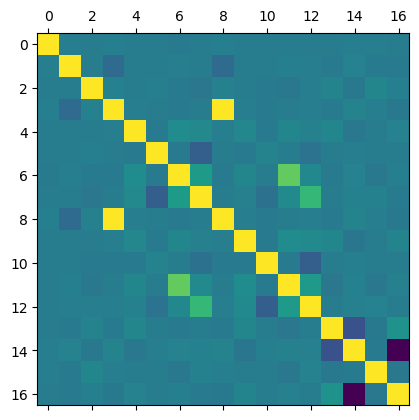

In [16]:
# Create a correlation heatmap using matplotlib
plt.matshow(df.corr())
plt.show()

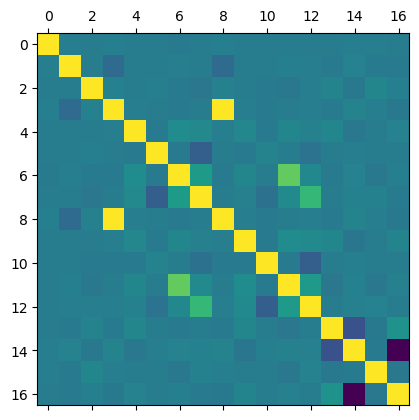

In [17]:
# Save figure
plt.matshow(df.corr())
plt.savefig("out.png") 

Text(0.5, 1.0, 'Correlation Matrix')

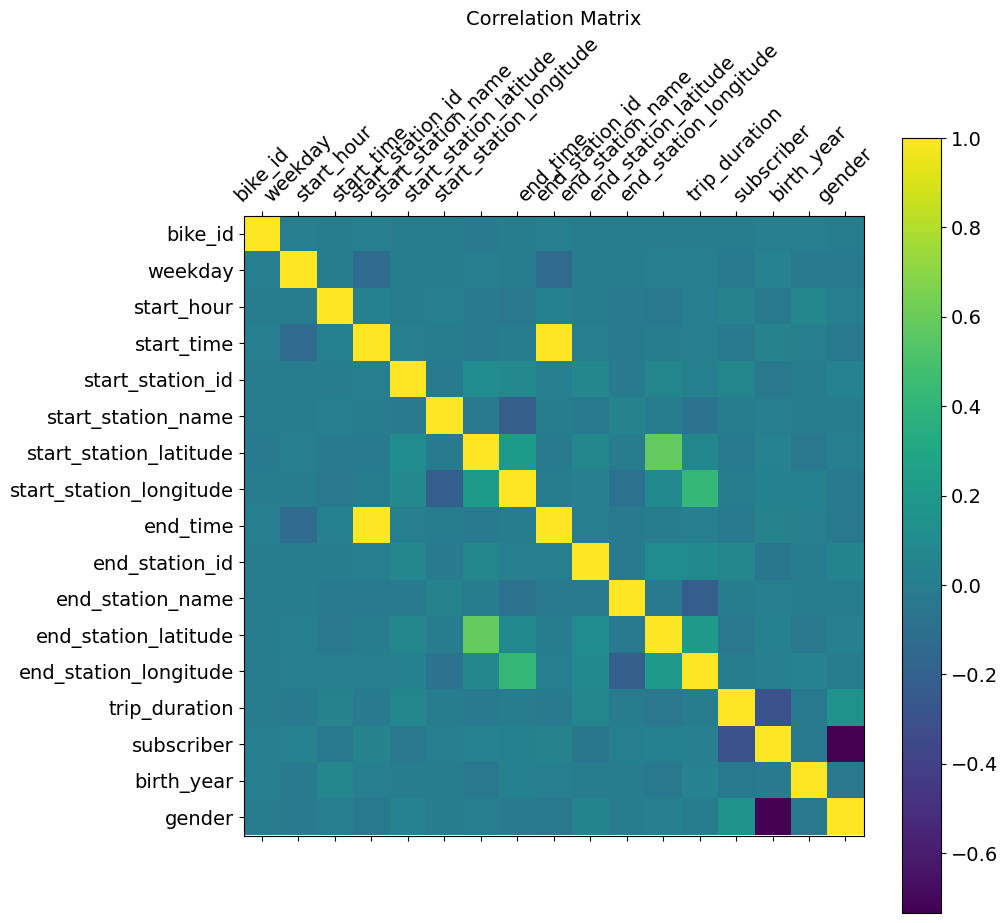

In [18]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(10, 10)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

### The yellow squares show a 1-1 relationship, because these are all the same variables. The darker the squares, the weaker the relationship between the variables.

## Creating a correlation heatmap using seaborn

In [19]:
df.columns

Index(['bike_id', 'weekday', 'start_hour', 'start_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender'],
      dtype='object')

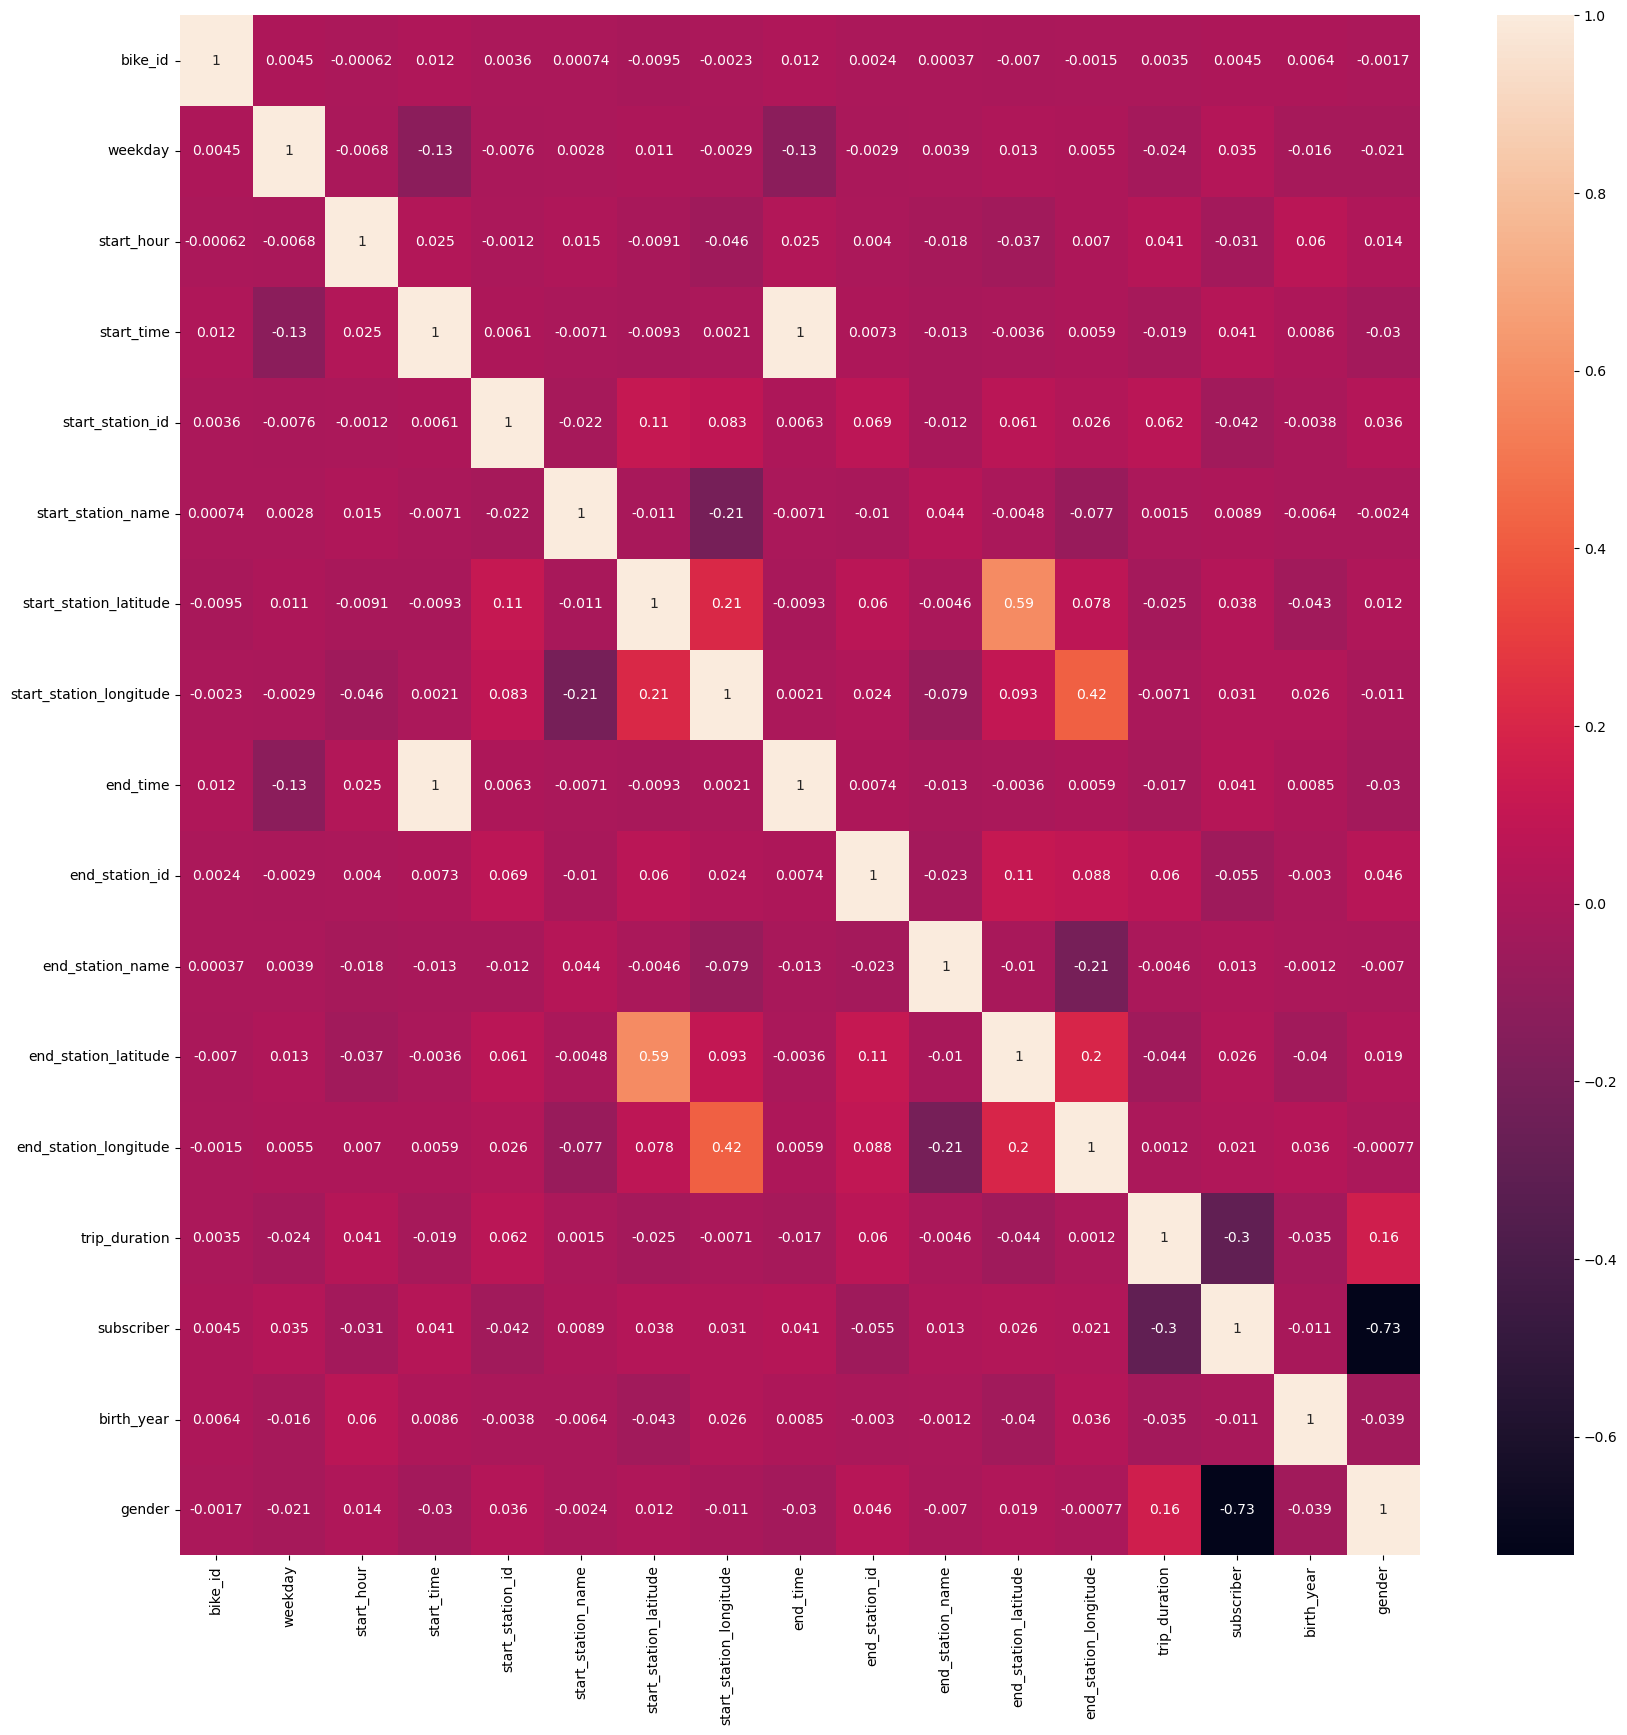

In [20]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(20,20))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df.corr(), annot = True, ax = ax)

In [33]:
f.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'corr_matrix.png'))

### The same here, the white squares show the strongest relationships, 1-1, because they are the same variables. The darker the squares, the weaker the relationships and the lighter the squares, the stronger the relationships.

In [21]:
# Creating subset

sub = df[['weekday', 'trip_duration', 'subscriber', 'birth_year', 'gender']]
sub.head(5)

,weekday,trip_duration,subscriber,birth_year,gender
0,1,993,1,1968,0
1,4,581,1,1983,1
2,6,361,1,1989,1
3,2,561,1,1988,0
4,2,2296,0,1976,2


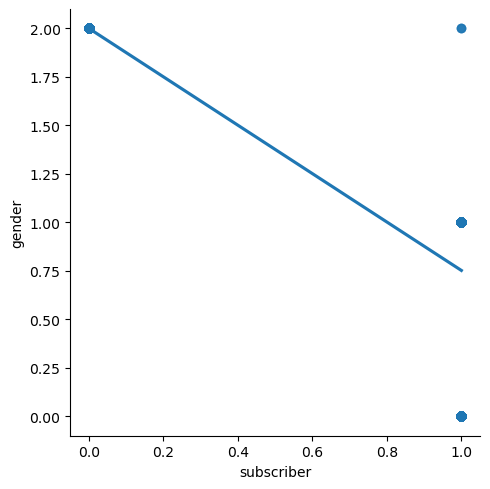

In [23]:
# Create a scatterplot for the "subscriber" and "gender" columns in seaborn

sns.lmplot(x = 'subscriber', y = 'gender', data = df)

## There are more male subscribers than female subscribers.

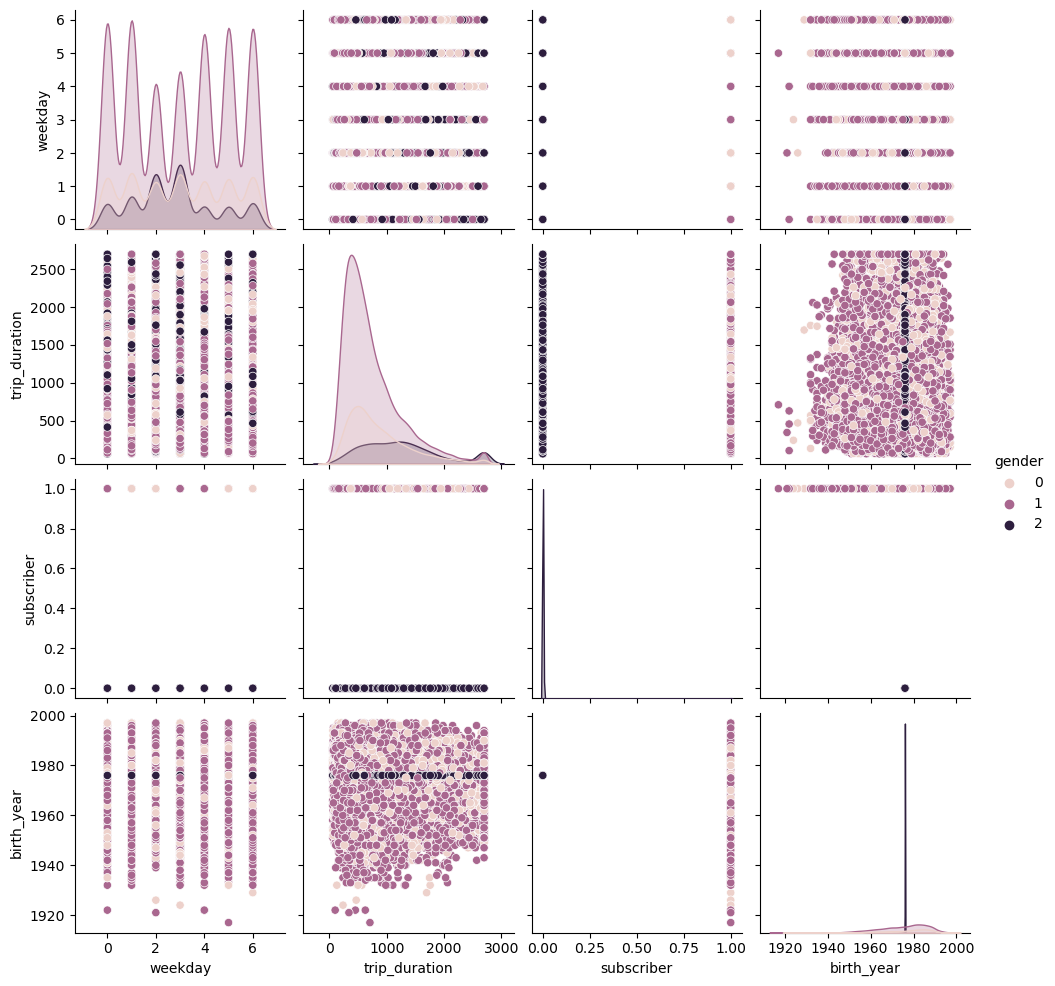

In [24]:
# Create a pair plot 

g = sns.pairplot(sub, hue="gender")

### This pair plot, which is a combination of scatterplot and histogram, doesn't show much information. Birth_year crossed with trip_duration show a little upward trend, meaning that the younger people get, the longer their trips lasted. The rest, I really can't see any trends or patterns. Please advise.

## Categorial Plots:

<Axes: xlabel='weekday', ylabel='Count'>

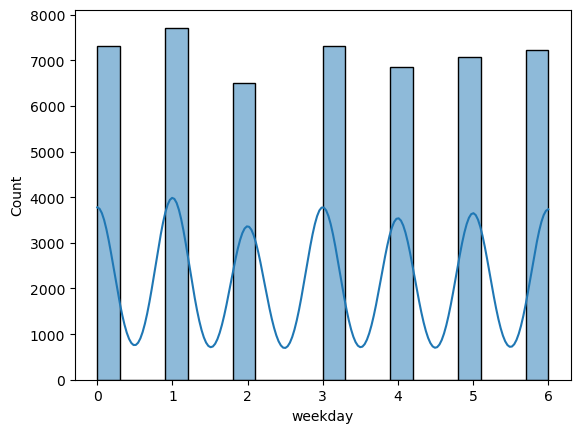

In [25]:
sns.histplot(df['weekday'], bins = 20, kde = True)

## All days seem to be equally busy, just Saturdays slightly less busy.

<Axes: xlabel='start_hour', ylabel='Count'>

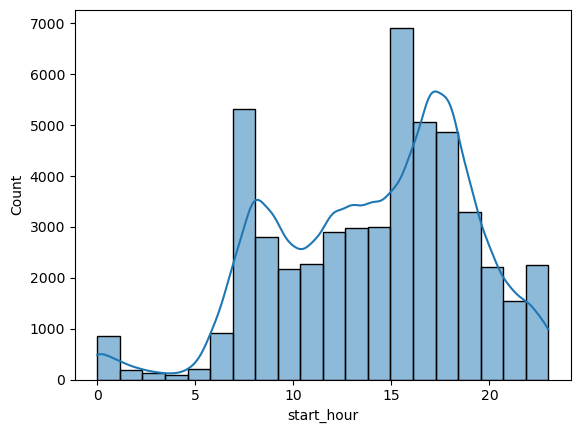

In [26]:
sns.histplot(df['start_hour'], bins = 20, kde = True)

## 07:00 and 16:00 are the busiest start hours of the day. I assume that's when people are going to work and going home from work.

In [27]:
# Creating categorical variable that splits the start_hour column into categories
df.loc[df['start_hour'] < 7, 'Busy times'] = 'Least busy'

In [28]:
df.loc[(df['start_hour'] >= 7) & (df['start_hour'] < 17), 'Busy times'] = 'Busy'

In [29]:
df.loc[df['start_hour'] >= 17, 'Busy times'] = 'Busiest'

In [30]:
df['Busy times'].value_counts(dropna = False)

Busy times
Busy          28367
Busiest       19236
Least busy     2374
Name: count, dtype: int64

### I see what I did wrong here before. I used the count on the y axis in plot above to define start hour. Stupid me should have known to use the 24 hours in the day.

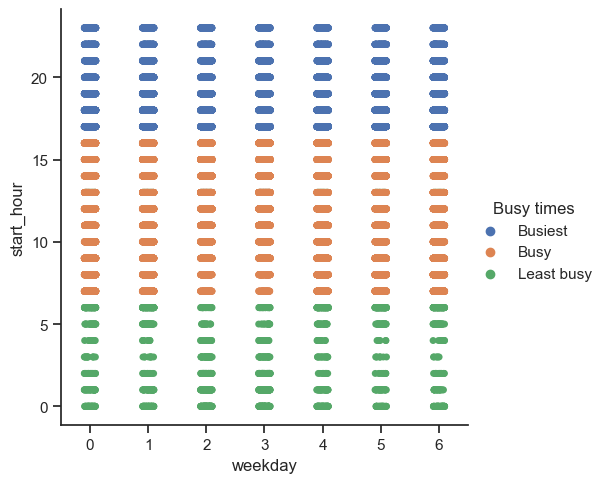

In [31]:
# Create a categorical plot in seaborn using the busy times categories created above

sns.set(style="ticks")
g = sns.catplot(x="weekday", y="start_hour", hue="Busy times", data=df)

### I'm not sure if this is 100% correct and agreeing with the histoplot above, because this one looks like the categories are divided into 3 almost-equal sections. During the night and until 06:00, it's the least busy times, due to the fact that people are sleeping. Then until 16:00 it's busy, but not as busy as 17:00 - 23:00. 